# Plotting the Inconsistency Events per Task for the Different Matching Logic Approaches
## NAME: Rishit Chaudhary
## SRN: PES1201800316

In [1]:
from pathlib import Path
import seaborn as sns
import os
import pandas as pd
import numpy as np

In [2]:
class LogRecord:
    TRACE_NAME_IND = 0
    GM_COUNT_IND = 1
    LM_COUNT_IND = 2
    PARTITION_SIZE_IND = 3
    INTERNAL_INCONSISTENCY_COUNT_IND = 16
    EXTERNAL_INCONSISTENCY_COUNT_IND = 17
    INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 12
    EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 13
    SUCCESS_PERCENT_IND = 30
    AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND = 31

    LAST_TERM_IND = -1
    
    def __init__(self, file_data):
        self.file_data = file_data.split('\n')
        print(self.file_data)

    def __extract_int(self, line_index, term_index):
        print(self.file_data[line_index])
        return int(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_float(self, line_index, term_index):
        print(self.file_data[line_index])
        return float(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_str(self, line_index, term_index):
        print(self.file_data[line_index])
        return str(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_success_percent(self, line_index, term_index):
        return float(self.file_data[line_index].strip().split()[term_index].split('=')[-1].rstrip('%'))
    
    def get_gm_count(self):
        return self.__extract_int(LogRecord.GM_COUNT_IND, self.LAST_TERM_IND)

    def get_lm_count(self):
        return self.__extract_int(LogRecord.LM_COUNT_IND, self.LAST_TERM_IND)

    def get_partition_size(self):
        return self.__extract_int(LogRecord.PARTITION_SIZE_IND, self.LAST_TERM_IND)
 
    def get_cluster_size(self):
        return self.get_gm_count() * self.get_lm_count() * self.get_partition_size()

    def get_internal_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)
    
    def get_external_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)

    def get_avg_workers_searched_per_task_count(self):
        return self.__extract_float(LogRecord.AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND, self.LAST_TERM_IND)

    def get_trace_file_name(self):
        return self.__extract_str(LogRecord.TRACE_NAME_IND, self.LAST_TERM_IND)

    def get_success_percent(self):
        return self.__extract_success_percent(LogRecord.SUCCESS_PERCENT_IND, LogRecord.LAST_TERM_IND)
    
    def get_internal_inconsistency_count(self):
        return self.__extract_int(LogRecord.INTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)
    
    def get_external_inconsistency_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)

In [3]:
MATCHING_LOGIC_TECHNIQUES = ['Original',
                             'Separation',
                             'Ordering_L_M',
                             'Ordering_M_L',
                             'Ordering_L_L',
                             'Ordering_M_M']

# Cluster Size
TEN_THOUSAND_NODE_CLUSTER_SIZE = 5000
THOUSAND_NODE_CLUSTER_SIZE = 4900

CLUSTER_TRACE_NAMES = {'synthetic_FB_sub_2000jobs'}

# BASE_FILE_PATH = Path("./inconsistency_count")
# BASE_FILE_PATH = Path("./inconsistency_worker_count")
# BASE_FILE_PATH = Path("./inconsistency_worker_count_synthetic_separate_random")
BASE_FILE_PATH = Path("FB_syn_inconsistency_worker_count_synthetic_separate_random")
# BASE_FILE_PATH = Path("./inconsistency_count_with_same_random_seed")

INTERNAL_INCONSISTENCY_FILE_EXTENSION = "_ini.txt"
EXTERNAL_INCONSISTENCY_FILE_EXTENSION = "_exi.txt"
WORKERS_SEARCHED_FILE_EXTENSION = "_workers_searched.txt"
LOG_FILE_EXTENSION = ".log"

BASE_FILE_PATH

PosixPath('FB_syn_inconsistency_worker_count_synthetic_separate_random')

In [4]:
MATCHING_LOGIC_DATA = dict()

MAIN_STATISTICS = 0
INTERNAL_INCONSISTENCY_COUNT = 1
EXTERNAL_INCONSISTENCY_COUNT = 2
COMBINED_INCONSISTENCY_COUNT = 3

WORKERS_SEARCHED_COUNT = 4
READ_WORKERS_SEARCHED_COUNT = 5


for logic in MATCHING_LOGIC_TECHNIQUES:
    MATCHING_LOGIC_DATA[logic] = dict()
    for trace in CLUSTER_TRACE_NAMES:
        MATCHING_LOGIC_DATA[logic][trace] = dict()
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            MATCHING_LOGIC_DATA[logic][trace][cluster_size] = dict()
            MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT] = dict()
            MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT] = dict()
        

In [5]:
isLogFile = lambda x : x.endswith(LOG_FILE_EXTENSION)
isInternalInconsistencyFile = lambda x : x.endswith(INTERNAL_INCONSISTENCY_FILE_EXTENSION)
isExternalInconsistencyFile = lambda x : x.endswith(EXTERNAL_INCONSISTENCY_FILE_EXTENSION)
isWorkersSearchedFile = lambda x: x.endswith(WORKERS_SEARCHED_FILE_EXTENSION)

In [6]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    FILES_IN_MATCHING_LOGIC_FOLDER = os.listdir(BASE_FILE_PATH / Path(logic))
    LOG_FILE_LIST = filter(isLogFile, FILES_IN_MATCHING_LOGIC_FOLDER)
    for log_file in LOG_FILE_LIST:
        LOG_FILE_NAME_WITHOUT_EXTENSION = log_file.split('.')[0]
        INTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isInternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        EXTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isExternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        
        WORKERS_SEARCHED_FILE = [
            x
            for x in FILES_IN_MATCHING_LOGIC_FOLDER
                if isWorkersSearchedFile(x) and
                   x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)
        ]
        
        # ---
        
        if bool(INTERNAL_INCONSISTENCY_FILE) is False or \
           bool(EXTERNAL_INCONSISTENCY_FILE) is False or \
           os.path.getsize(BASE_FILE_PATH / Path(logic) / Path(log_file)) == 0:
            continue

        # Get the trace name from log_file
        with open(BASE_FILE_PATH / Path(logic) / Path(log_file)) as fHandler:
            file_data = fHandler.read()
            cluster_trace_name = LogRecord(file_data).get_trace_file_name()
            cluster_size = LogRecord(file_data).get_cluster_size()
            
        if cluster_trace_name not in CLUSTER_TRACE_NAMES:
            continue

        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][MAIN_STATISTICS] = log_file
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][INTERNAL_INCONSISTENCY_COUNT] = \
            INTERNAL_INCONSISTENCY_FILE[0]
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][EXTERNAL_INCONSISTENCY_COUNT] = \
            EXTERNAL_INCONSISTENCY_FILE[0]
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][WORKERS_SEARCHED_COUNT] = \
            WORKERS_SEARCHED_FILE[0]


MATCHING_LOGIC_DATA

['Analysing logs for trace file: synthetic_FB_sub_2000jobs', 'Number of GMs: 10', 'Number of LMs: 10', 'Number of Partition Size: 50', 'Simulator Info , Received CMD line arguments.', 'Simulator Info , Simulation running', 'Simulation ended in 29446.456919431686 s ', 'Simulator Info , Number of Jobs completed: 2000', '', '', '--------------------------------------------------------------------------------', '', '\x1binternal_matching_logic_op\x1b : 97990586', '\x1bexternal_matching_logic_op\x1b : 686593493', '\x1btask_end_event\x1b : 159921', '\x1blaunch_on_node_event\x1b : 159921', '\x1binternal_inconsistency_event\x1b : 38717', '\x1bexternal_inconsistency_event\x1b : 150848', '\x1bmatch_found_event\x1b : 349486', '\x1bperiodic_lm_update_event\x1b : 316', '\x1baperiodic_lm_update_event\x1b : 349486', '\x1bjob_arrival_event\x1b : 2000', '\x1bcluster_saturated_event\x1b : 57302', '', '', '--------------------------------------------------------------------------------', '', 'Derived att

{'Original': {'synthetic_FB_sub_2000jobs': {5000: {3: {},
    5: {},
    0: 'record-2021-10-23-21-26-48.log',
    1: 'record-2021-10-23-21-26-48_ini.txt',
    2: 'record-2021-10-23-21-26-48_exi.txt',
    4: 'record-2021-10-23-21-26-48_workers_searched.txt'},
   4900: {3: {},
    5: {},
    0: 'record-2021-10-23-21-26-50.log',
    1: 'record-2021-10-23-21-26-50_ini.txt',
    2: 'record-2021-10-23-21-26-50_exi.txt',
    4: 'record-2021-10-23-21-26-50_workers_searched.txt'}}},
 'Separation': {'synthetic_FB_sub_2000jobs': {5000: {3: {},
    5: {},
    0: 'record-2021-10-23-21-26-55.log',
    1: 'record-2021-10-23-21-26-55_ini.txt',
    2: 'record-2021-10-23-21-26-55_exi.txt',
    4: 'record-2021-10-23-21-26-55_workers_searched.txt'},
   4900: {3: {},
    5: {},
    0: 'record-2021-10-23-21-26-57.log',
    1: 'record-2021-10-23-21-26-57_ini.txt',
    2: 'record-2021-10-23-21-26-57_exi.txt',
    4: 'record-2021-10-23-21-26-57_workers_searched.txt'}}},
 'Ordering_L_M': {'synthetic_FB_sub_2000

In [7]:
getPathToFile = lambda matching_logic, file_name : BASE_FILE_PATH / Path(matching_logic) / Path(file_name)
getPathToFile("Separation", "record-2021-10-13-17-42-17_ini.txt")

PosixPath('FB_syn_inconsistency_worker_count_synthetic_separate_random/Separation/record-2021-10-13-17-42-17_ini.txt')

In [8]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    for trace in CLUSTER_TRACE_NAMES:
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            print(logic, trace, cluster_size)
            INTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][INTERNAL_INCONSISTENCY_COUNT]
            EXTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][EXTERNAL_INCONSISTENCY_COUNT]
            WORKERS_SEARCHED_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][WORKERS_SEARCHED_COUNT]
            
            with open(getPathToFile(logic, INTERNAL_INCONSISTENCY_FILE)) as fHandler_int, \
                 open(getPathToFile(logic, EXTERNAL_INCONSISTENCY_FILE)) as fHandler_ext, \
                 open(getPathToFile(logic, WORKERS_SEARCHED_FILE)) as fHandler_workers:
                    # Adding internal inconsistency counts
                    for line in fHandler_int:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

                    # Adding external inconsistency counts
                    for line in fHandler_ext:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

                    # Adding workers searched counts
                    for line in fHandler_workers:
                        job_id_task_id, search_count = [x.strip() for x in line.split(':')]
                        search_count = int(search_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT][job_id_task_id] = \
                            search_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT].get(job_id_task_id, 0)


MATCHING_LOGIC_DATA

Original synthetic_FB_sub_2000jobs 5000
Original synthetic_FB_sub_2000jobs 4900
Separation synthetic_FB_sub_2000jobs 5000
Separation synthetic_FB_sub_2000jobs 4900
Ordering_L_M synthetic_FB_sub_2000jobs 5000
Ordering_L_M synthetic_FB_sub_2000jobs 4900
Ordering_M_L synthetic_FB_sub_2000jobs 5000
Ordering_M_L synthetic_FB_sub_2000jobs 4900
Ordering_L_L synthetic_FB_sub_2000jobs 5000
Ordering_L_L synthetic_FB_sub_2000jobs 4900
Ordering_M_M synthetic_FB_sub_2000jobs 5000
Ordering_M_M synthetic_FB_sub_2000jobs 4900


{'Original': {'synthetic_FB_sub_2000jobs': {5000: {3: {'41_37': 4,
     '41_23': 3,
     '41_32': 1,
     '41_22': 1,
     '41_29': 3,
     '41_33': 1,
     '41_31': 2,
     '41_28': 1,
     '41_21': 2,
     '41_24': 4,
     '41_4': 3,
     '41_39': 3,
     '41_40': 4,
     '41_41': 2,
     '41_9': 2,
     '41_3': 4,
     '41_36': 4,
     '41_38': 4,
     '41_18': 2,
     '41_2': 2,
     '41_35': 5,
     '41_1': 3,
     '41_19': 3,
     '41_11': 4,
     '41_5': 2,
     '41_8': 4,
     '41_12': 4,
     '41_7': 2,
     '41_17': 1,
     '41_6': 4,
     '41_20': 3,
     '41_13': 1,
     '41_26': 2,
     '41_27': 2,
     '41_30': 1,
     '41_14': 3,
     '41_34': 1,
     '41_15': 3,
     '41_25': 3,
     '41_10': 1,
     '41_16': 1,
     '96_50': 2,
     '96_49': 2,
     '96_53': 2,
     '112_2': 17,
     '112_1': 14,
     '112_5': 11,
     '112_72': 12,
     '112_83': 8,
     '112_73': 16,
     '112_75': 13,
     '112_80': 8,
     '112_66': 13,
     '112_3': 15,
     '112_30': 6,
     '112

---

## Get the Total Task Count per Trace:

In [9]:
TASK_COUNT_IND = 1
CLUSTER_TRACE_FILE_EXTENSION = ".tr"

In [10]:
def total_tasks_in_trace(PATH_TO_TRACE_FILE, cluster_trace_name):
    task_count = 0
    with open(PATH_TO_TRACE_FILE / Path(cluster_trace_name + CLUSTER_TRACE_FILE_EXTENSION)) as fHandler:
        for job in fHandler:
            task_count += int(job.split()[TASK_COUNT_IND])
    
    return task_count

In [11]:
PATH_TO_TRACE_FILE = BASE_FILE_PATH / Path("traces")

total_task_count_per_trace = dict()

for cluster_trace_name in CLUSTER_TRACE_NAMES:
    total_task_count_per_trace[cluster_trace_name] = total_tasks_in_trace(PATH_TO_TRACE_FILE, cluster_trace_name)

total_task_count_per_trace

{'synthetic_FB_sub_2000jobs': 159921}

---

In [12]:
WORKERS_SEARCHED_X_AXIS_NAME = INCONSISTENCY_COUNT_X_AXIS_NAME = "Matching Logic Approaches"

In [13]:
INCONSISTENCY_COUNT_Y_AXIS_NAME = "Inconsistency Count per Task"

In [14]:
WORKERS_SEARCHED_Y_AXIS_NAME = "Workers Searched per Task"

In [15]:
def create_inconsistency_dataframe(MATCHING_LOGIC_DATA, CLUSTER_TRACE_NAMES, TRACE_NAME, CLUSTER_SIZE):
    assert TRACE_NAME in CLUSTER_TRACE_NAMES, f"Invalid trace name={TRACE_NAME} provided!"
    assert CLUSTER_SIZE in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE], \
            f"Invalid cluster size={CLUSTER_SIZE} provided!"
    
    input_list = list()
#     for logic in filter(lambda x : x != "Original", MATCHING_LOGIC_TECHNIQUES):  # To ignore Original approach
    for logic in MATCHING_LOGIC_TECHNIQUES:
        # Add tasks which did have inconsistency events > 0
        for datum in MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].values():
            input_list.append([logic, datum])
        
        if len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].values()) == 0:
            # Add tasks which did not have any inconsistency events with 0
            NO_INCONSISTENCY_EVENT = 0
            task_count_with_inconsistency_event = \
                len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].keys())
            for _ in range(total_task_count_per_trace[TRACE_NAME] - task_count_with_inconsistency_event):
                input_list.append([logic, NO_INCONSISTENCY_EVENT])

    return pd.DataFrame(input_list, columns=[INCONSISTENCY_COUNT_X_AXIS_NAME, INCONSISTENCY_COUNT_Y_AXIS_NAME])

In [16]:
def create_workers_searched_dataframe(MATCHING_LOGIC_DATA, CLUSTER_TRACE_NAMES, TRACE_NAME, CLUSTER_SIZE):
    assert TRACE_NAME in CLUSTER_TRACE_NAMES, f"Invalid trace name={TRACE_NAME} provided!"
    assert CLUSTER_SIZE in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE], \
            f"Invalid cluster size={CLUSTER_SIZE} provided!"
    
    input_list = list()
#     for logic in filter(lambda x : x != "Original", MATCHING_LOGIC_TECHNIQUES):  # To ignore Original approach
    for logic in MATCHING_LOGIC_TECHNIQUES:
        # Add tasks which did have inconsistency events > 0
        for datum in MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][READ_WORKERS_SEARCHED_COUNT].values():
            input_list.append([logic, datum])
        
        # Add tasks which did not have any inconsistency events with 0
#         NO_INCONSISTENCY_EVENT = 0
#         task_count_with_inconsistency_event = \
#             len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].keys())
#         for _ in range(total_task_count_per_trace[TRACE_NAME] - task_count_with_inconsistency_event):
#             input_list.append([logic, NO_INCONSISTENCY_EVENT])

    return pd.DataFrame(input_list, columns=[WORKERS_SEARCHED_X_AXIS_NAME, WORKERS_SEARCHED_Y_AXIS_NAME])

In [17]:
MATCHING_LOGIC_DATA["Ordering_L_M"]["synthetic_FB_sub_2000jobs"][5_000][COMBINED_INCONSISTENCY_COUNT]

{'66_155': 1,
 '98_60': 2,
 '98_91': 3,
 '98_80': 2,
 '98_101': 2,
 '98_45': 2,
 '98_111': 2,
 '98_51': 2,
 '98_115': 2,
 '98_130': 3,
 '98_108': 2,
 '98_105': 2,
 '98_89': 3,
 '98_61': 3,
 '98_85': 2,
 '98_52': 2,
 '112_20': 1,
 '117_71': 1,
 '118_29': 1,
 '129_70': 2,
 '129_147': 4,
 '129_149': 2,
 '129_78': 3,
 '129_49': 5,
 '129_45': 4,
 '129_34': 3,
 '129_116': 3,
 '129_117': 2,
 '129_114': 2,
 '129_126': 2,
 '129_87': 2,
 '129_46': 3,
 '129_83': 5,
 '129_130': 3,
 '129_134': 2,
 '129_159': 3,
 '129_156': 5,
 '129_158': 2,
 '129_157': 3,
 '132_28': 1,
 '135_34': 1,
 '135_54': 1,
 '135_51': 1,
 '135_78': 1,
 '135_63': 2,
 '135_73': 1,
 '135_74': 1,
 '136_172': 3,
 '136_170': 3,
 '136_151': 3,
 '136_156': 4,
 '136_152': 3,
 '136_153': 2,
 '136_112': 2,
 '136_95': 3,
 '136_31': 2,
 '136_47': 3,
 '136_83': 3,
 '136_82': 2,
 '136_104': 3,
 '136_168': 4,
 '136_127': 4,
 '136_117': 2,
 '136_18': 3,
 '136_26': 3,
 '136_40': 3,
 '136_86': 3,
 '136_88': 3,
 '136_121': 4,
 '136_146': 3,
 '13

---

In [18]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15.7,10.5)})
sns.set(font_scale = 1.75)

---

In [19]:
SHOW_OUTLIERS = False

# Inconsistency Events Per Task

## Plot for `synthetic_FB_sub_2000jobs` in 4900 Node cluster

In [20]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_FB_sub_2000jobs",
                               4900
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                   34633.0  3.185748  2.798118   
Ordering_L_M                                   31491.0  2.828681  2.429081   
Ordering_M_L                                   33300.0  3.159099  2.770906   
Ordering_M_M                                   31553.0  2.763794  2.357639   
Original                                       35538.0  4.181608  4.956047   
Separation                                     32746.0  2.620900  2.287650   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  2.0  4.0  26.0  
Ordering_L_M               1.0  1.0  2.0  4.0  23.0  
Ordering_M_L               1.0  1.0  2.0  4.0  24.0  
Ordering_M_M               1.0  1.0  2.0  4.0  27.0  
Original                   1.0  1.0  2.0  5.0  39.0  
Separation                 1.0  1.0  2.0  3.0  26.0

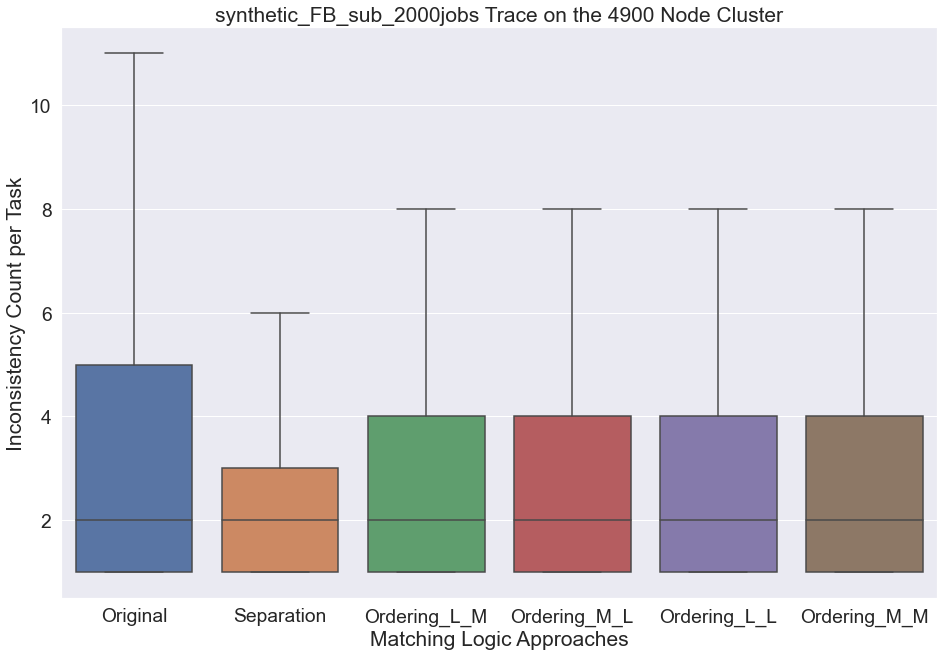

In [21]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME, 
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "synthetic_FB_sub_2000jobs",
                                                     4900
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 4900 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_4900.jpeg"), dpi=300) 

---

## Plot for `synthetic_FB_sub_2000jobs` in 5000 Node cluster

In [22]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_FB_sub_2000jobs",
                               5000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                   36444.0  3.694380  2.917746   
Ordering_L_M                                   30963.0  2.995672  2.296307   
Ordering_M_L                                   35690.0  3.615046  2.985409   
Ordering_M_M                                   32357.0  2.927033  2.221193   
Original                                       35750.0  5.302517  5.423128   
Separation                                     31802.0  2.421986  1.976855   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  3.0  5.0  25.0  
Ordering_L_M               1.0  1.0  2.0  4.0  23.0  
Ordering_M_L               1.0  1.0  3.0  5.0  30.0  
Ordering_M_M               1.0  1.0  2.0  4.0  26.0  
Original                   1.0  1.0  3.0  7.0  35.0  
Separation                 1.0  1.0  2.0  3.0  32.0

In [23]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "synthetic_FB_sub_2000jobs",
                               5000
                               )[INCONSISTENCY_COUNT_X_AXIS_NAME].unique()

# This result means that the other approaches did not have any inconsistency events
# array(['Original', 'Ordering_L_L'], dtype=object)

array(['Original', 'Separation', 'Ordering_L_M', 'Ordering_M_L',
       'Ordering_L_L', 'Ordering_M_M'], dtype=object)

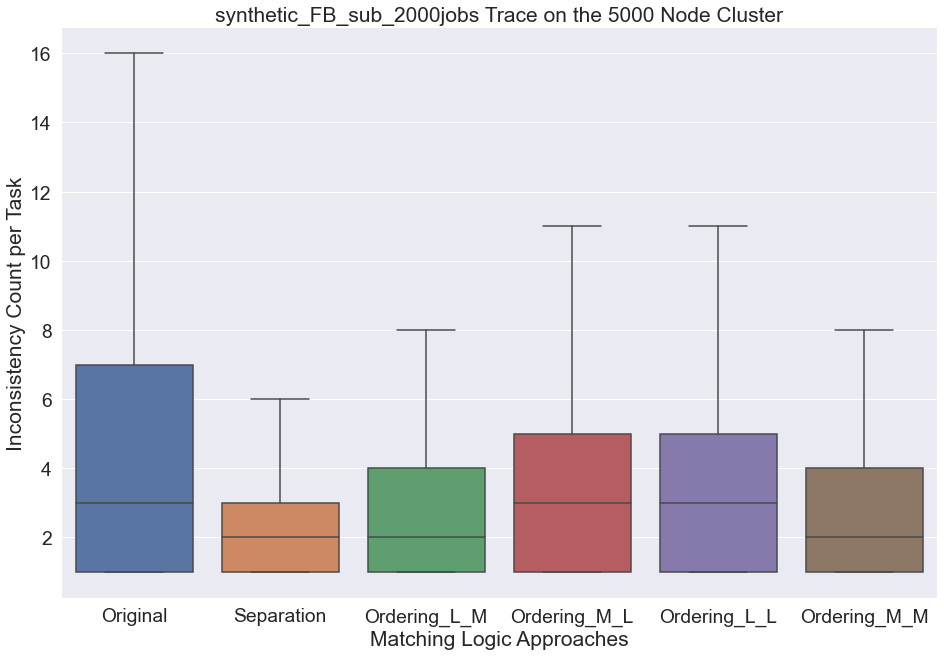

In [24]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME,
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "synthetic_FB_sub_2000jobs",
                                                     5000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 5000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_5000.jpeg"), dpi=300) 

---

# Workers Searched Per Task

## Plot for `synthetic_FB_sub_2000jobs` in 4900 Node cluster

In [25]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "synthetic_FB_sub_2000jobs",
                                  4900
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

Workers Searched per Task               \
                                              count         mean   
Matching Logic Approaches                                          
Ordering_L_L                               159921.0     1.689916   
Ordering_L_M                               159921.0     1.557013   
Ordering_M_L                               159921.0     1.657812   
Ordering_M_M                               159921.0     1.545307   
Original                                   159921.0  5236.945567   
Separation                                 159921.0     1.536665   

                                                                              
                                    std  min   25%    50%     75%        max  
Matching Logic Approaches                                                     
Ordering_L_L                   1.848637  1.0   1.0    1.0     1.0       27.0  
Ordering_L_M                   1.557953  1.0   1.0    1.0     1.0       24.0  
Ordering_M_L                   1.801140  1.0   1.0    1.0     1.0       25.0  
Ordering_M_M                   1.518697  1.0   1.0    1.0     1.0       28.0  
Original                   22256.901725  1.0  52.0  754.0  3527.0  1960922.0  
Separation                     1.479904  1.0   1.0    1.0     1.0       27.0

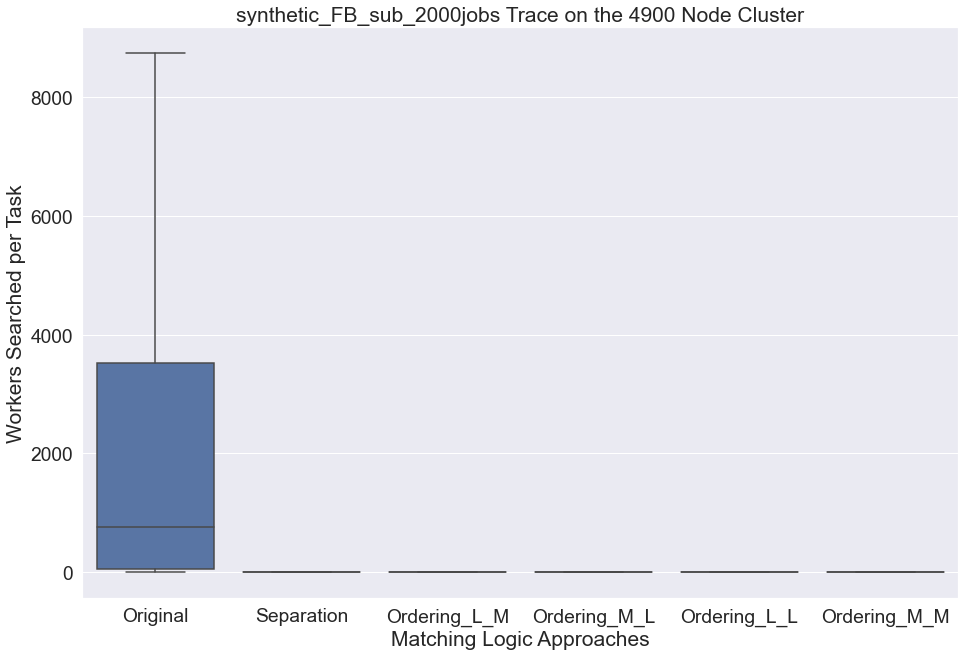

In [26]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "synthetic_FB_sub_2000jobs",
                                                        4900
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 4900 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_4900_workers_searched.jpeg"), dpi=300) 

---

## Plot for `synthetic_FB_sub_2000jobs` in 5000 Node cluster

In [27]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "synthetic_FB_sub_2000jobs",
                                  5000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

Workers Searched per Task               \
                                              count         mean   
Matching Logic Approaches                                          
Ordering_L_L                               159921.0     1.841903   
Ordering_L_M                               159921.0     1.580005   
Ordering_M_L                               159921.0     1.806780   
Ordering_M_M                               159921.0     1.592230   
Original                                   159921.0  4906.072867   
Separation                                 159921.0     1.481638   

                                                                              
                                    std  min   25%    50%     75%        max  
Matching Logic Approaches                                                     
Ordering_L_L                   2.083637  1.0   1.0    1.0     1.0       26.0  
Ordering_L_M                   1.556282  1.0   1.0    1.0     1.0       24.0  
Ordering_M_L                   2.062689  1.0   1.0    1.0     1.0       31.0  
Ordering_M_M                   1.543038  1.0   1.0    1.0     1.0       27.0  
Original                   22371.334029  1.0  28.0  544.0  3362.0  2225027.0  
Separation                     1.308308  1.0   1.0    1.0     1.0       33.0

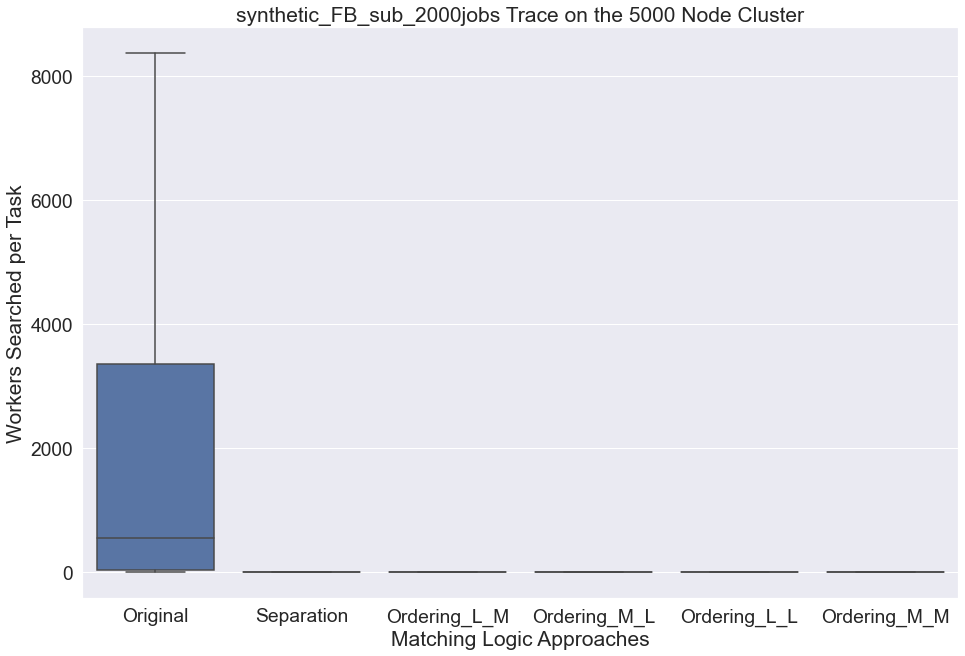

In [28]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "synthetic_FB_sub_2000jobs",
                                                        5000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='synthetic_FB_sub_2000jobs Trace on the 5000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("synthetic_FB_sub_2000jobs_5000_workers_searched.jpeg"), dpi=300) 

---